# Trabalho 6 - Transformada de Fourier e realce no domínio da frequência

Faça as seguintes simulações no jupyther notebook e aproveite os recursos disponíveis para explicar os fundamentos e resultados obtidos

### (1) Série de Fourier de função unidimensional

A função triangular, representada pelo gráfico a seguir, é uma função periódica. Esta classe de funções pode ser representa através de uma série de Fourier.

![](../images/GraficoFuncaoTriangular.png)

A série de Fourier que representa esta função é dada pela seguinte equação:

![](../images/triangularFuncao.png)

Varie o número de senóides para apresentar graficamente diferentes aproximações da função triangular.

[Referência](http://www.matematica.pucminas.br/profs/web_fabiano/calculo4/sf.pdf)

### (2) Prova empírica da propriedade translação e mudança de fase

* (2.1) - Crie duas imagens binárias contendo um mesmo objeto geométrico. A diferença entre as imagens é a translação em que o objeto aparece.
* (2.2) - Calcule a o módulo da transformada de Fourier de cada uma das imagens
* (2.3) - Faça a subtração entre estas imagens e a utilize para demostrar a propriedade  
    
    Referência: Gonzalez e Woods Processamento digital de Imagens

### (3) Filtragem de Fourier pegue uma fotografia de sua autoria.

Execute a filtragem passa-baixa de Fourier desta imagem usando os filtros Butterworth e Ideal.

Compare os resultados obtidos em termos dos fundamentos teóricos correspondentes. 

Referência: Gonzalez e Woods Processamento digital de Imagens

### (4) Filtros espaciais aproximados

Utilizando a imagem e o filtro de Butterworth empregados no exercício anterior, obtenha filtros aproximados no domínio espacial de dimensões nxn . Para este valor de n calcule o somatório do erro quadrático da diferença entre os resultados obtidos pelo filtro exato e o aproximado. Repita este procedimento para diferentes valores de n e trace o gráfico n x SSE. Analise e explique os resultados obtidos. 

-------

### Bibliotecas

In [2]:
import numpy as np
import cv2 as cv

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

-------

## (1) Série de Fourier

Uma função periódica pode ser escrita por uma série de Fourier. A seguir mostraremos o resultado de uma série de Fourier, ao variar o número de senóides de sua expansão.

Partiremos da seguinte equação:

$$
\begin{equation}
    f(x) \sim \frac{1}{2} - \frac{4}{\pi^{2}}\sum^{\infty}_{k = 0}\frac{1}{(2k - 1)^{2}}\sin[(2k - 1)\pi x],
\end{equation}
$$

em que variar o número de senóides significa aumentar os termos do somatório.



In [71]:
def plota(img):
    num = len(img)
    fig = plt.figure(figsize = (15, 9))
    grid = plt.GridSpec(1, num, fig)
    
    for i in range(num):
        ax = fig.add_subplot(grid[0, i])
        ax.imshow(img[i], cmap = 'gray')
        ax.set_xticks([])
        ax.set_yticks([])
    
    return fig

In [72]:
x = np.linspace(-3, 3, 100)

In [73]:
f = np.sin(np.pi * x)

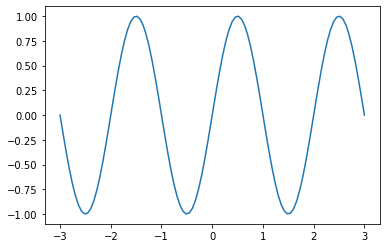

In [74]:
plt.plot(x, f)

In [65]:
k = 5
f = 0.5
for i in range(k):
    f -= (4/np.pi**2) * (np.sin((2 * i - 1) * np.pi * x)/(2 * i - 1)**2)

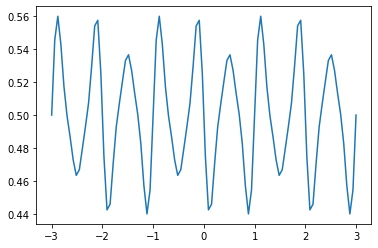

In [66]:
plt.plot(x, f)

In [67]:
f

array([0.5       , 0.54558932, 0.56007204, 0.54288966, 0.51727397,
       0.49956791, 0.48673551, 0.47277874, 0.46336492, 0.46681783,
       0.47982079, 0.49312352, 0.5072693 , 0.52963244, 0.5541951 ,
       0.55760269, 0.52522823, 0.47477177, 0.44239731, 0.4458049 ,
       0.47036756, 0.4927307 , 0.50687648, 0.52017921, 0.53318217,
       0.53663508, 0.52722126, 0.51326449, 0.50043209, 0.48272603,
       0.45711034, 0.43992796, 0.45441068, 0.5       , 0.54558932,
       0.56007204, 0.54288966, 0.51727397, 0.49956791, 0.48673551,
       0.47277874, 0.46336492, 0.46681783, 0.47982079, 0.49312352,
       0.5072693 , 0.52963244, 0.5541951 , 0.55760269, 0.52522823,
       0.47477177, 0.44239731, 0.4458049 , 0.47036756, 0.4927307 ,
       0.50687648, 0.52017921, 0.53318217, 0.53663508, 0.52722126,
       0.51326449, 0.50043209, 0.48272603, 0.45711034, 0.43992796,
       0.45441068, 0.5       , 0.54558932, 0.56007204, 0.54288966,
       0.51727397, 0.49956791, 0.48673551, 0.47277874, 0.46336